In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as c
from matplotlib import rcParams
import sympy as sy
import scipy.constants as pc
from sympy import *
from math import log10, floor
from numpy import sqrt 

rcParams['font.size'] = 18
rcParams['font.weight'] = 'bold'
rcParams['text.usetex'] = True
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Helvetica']

In [2]:
# Funktionen
def am(werte):
    return np.mean(werte)

def std(werte):
    summen_der_quadrate = 0
    for wert in werte:
        summen_der_quadrate+=(wert-am(werte))**2       
    return np.sqrt(summen_der_quadrate/(werte.size-1))

def stu(werte):
    return std(werte)/np.sqrt(werte.size)

def fehler(f, werte, unsicherheiten, variablen):
    zMax = 0
    for i in range(werte.size):
        dif = np.abs(sy.diff(f, variablen[i]))
        zMax += (dif * unsicherheiten[i])**2
    zMax = np.sqrt(zMax)
    for j in range(werte.size):
        zMax = sub(zMax, variablen[j], werte[j])
    return zMax

def fehlerMax(f, werte, unsicherheiten, variablen):
    zMax = 0
    for i in range(werte.size):
        dif = np.abs(sy.diff(f, variablen[i]))
        zMax += dif * unsicherheiten[i]
    for j in range(werte.size):
        zMax = sub(zMax, variablen[j], werte[j])
    return zMax

def groessterBeitrag(f, werte, unsicherheiten, variablen):
    zMax = 0
    zMaxArray = np.array([])
    for i in range (werte.size):
        zMax = (np.abs(sy.diff(f, variablen[i])) * unsicherheiten[i])
        for j in range(werte.size):
            zMax = sub(zMax, variablen[j], werte[j])
        x = np.array([zMax])
        zMaxArray = np.append(zMaxArray, x)
    return variablen[np.argmax(zMaxArray)],zMaxArray[np.argmax(zMaxArray)]

def sub(zMax, variable, wert):
    return zMax.subs([(variable, wert)])

def einfachGaussAdd(unsicherheiten, koeffizienten):
    dz = 0
    for i in range (unsicherheiten.size):
        dz += (koeffizienten[i]*unsicherheiten[i])**2
    return sqrt(dz)

def einfachGaussMult(unsicherheiten, werte, exponenten):
    dz = 0
    for i in range (unsicherheiten.size):
        dz += (exponenten[i]*unsicherheiten[i]/werte[i])**2
    return sqrt(dz)

def einfachGaussMultMax(unsicherheiten, werte, exponenten):
    max_a = 0
    num = -1
    for i in range (unsicherheiten.size):
        maxi = ((exponenten[i]*unsicherheiten[i])/werte[i])**2
        print(maxi)
        if max_a <= maxi:
            max_a = maxi
            num = i
    return (max_a, num)

def vertraeglichkeit(am_1, am_2, stu_1, stu_2):
    return (np.abs(am_1-am_2)/(sqrt((stu_1**2)*(stu_2**2))))

def bestA(x, y):
    return (sum(x**2)*sum(y)-sum(x)*sum(x*y))/(x.size*sum(x**2)-sum(x)**2)

def bestB(x, y):
    return (x.size*sum(x*y)-sum(x)*sum(y))/(x.size*sum(x**2)-sum(x)**2)

def streuung(x, y):
    s = 0
    for i in range(x.size):
        s += (y[i]+(bestA(x, y)+bestB(x, y)*x[i]))**2
    return np.sqrt(s/(x.size-2))

def stuA(x, y):
    s = streuung(x, y)
    return s*np.sqrt(sum(x**2)/((x.size*sum(x**2)-sum(x)**2)))

def stuB(x, y):
    s = streuung(x, y)
    return s*np.sqrt(x.size/((x.size*sum(x**2)-sum(x)**2)))



In [3]:
"""ieff = einfachGaussMult(np.array([0.09,0.001]), np.array([3.34,9.808]), np.array([2,1]))
x, d = symbols('x d')
variablen = [x, d]
g = sy.asin((d/x))
#print(g)
werte = np.array([0.88,0.0008])
unsicherheiten =np.array([0.05,0.0001])


winkel_std = fehler(g, werte, unsicherheiten, variablen)

print(winkel_std)
print(groessterBeitrag(g, werte, unsicherheiten, variablen))

#print(einfachGaussMult(np.array([0.001,0.001,ieff,winkel_std]), np.array([0.3866,9.808,0.88,0.046]), np.array([1,1,1,1])))
#print(einfachGaussMultMax(np.array([0.001,0.001,ieff,winkel_std]), np.array([0.3866,9.808,0.88,0.046]), np.array([1,1,1,1])))"""

"ieff = einfachGaussMult(np.array([0.09,0.001]), np.array([3.34,9.808]), np.array([2,1]))\nx, d = symbols('x d')\nvariablen = [x, d]\ng = sy.asin((d/x))\n#print(g)\nwerte = np.array([0.88,0.0008])\nunsicherheiten =np.array([0.05,0.0001])\n\n\nwinkel_std = fehler(g, werte, unsicherheiten, variablen)\n\nprint(winkel_std)\nprint(groessterBeitrag(g, werte, unsicherheiten, variablen))\n\n#print(einfachGaussMult(np.array([0.001,0.001,ieff,winkel_std]), np.array([0.3866,9.808,0.88,0.046]), np.array([1,1,1,1])))\n#print(einfachGaussMultMax(np.array([0.001,0.001,ieff,winkel_std]), np.array([0.3866,9.808,0.88,0.046]), np.array([1,1,1,1])))"

In [4]:
print(einfachGaussMult(np.array([0.09,0.001]), np.array([3.34,9.808]), np.array([2,1])))
print(einfachGaussMultMax(np.array([0.09,0.001]), np.array([3.34,9.808]), np.array([2,1])))

0.053892312014516434
0.0029043708989207216
1.039534927042944e-08
(0.0029043708989207216, 0)


In [5]:
#Messwerte
g = np.array([400,410,420,430,440,450,460,470])#mm
G = np.ones(8)*7 #mm

e1 = np.array([732,704,685,674,667,665,664,658])#mm
B1 = np.array([15.,12.,11.,10.,8.,8.,7.,6.])#mm

e2 = np.array([662,661,661,663,669,673,679,681])#mm
B2 = np.array([8,7,6,6,6,5,5,5])#mm

e_std = np.ones(8)*3
B_std = np.ones(8)
g_std = np.ones(8)
G_std = np.ones(8)*0.1
print(g_std)

[1. 1. 1. 1. 1. 1. 1. 1.]


In [6]:
beta1 = B1/G
beta2 = B2/G

b_strich_1 = (e1 - 204)-(g - 204)
b_strich_2 = (e2 - 204)-(g - 204)

beta1_d = np.sum(beta1)/8
beta2_d = np.sum(beta2)/8
b_strich_1_d = np.sum(b_strich_1)/8
b_strich_2_d = np.sum(b_strich_2)/8

print(beta1_d,b_strich_1_d,beta2_d,b_strich_2_d)

#beta Unsicherheiten
beta_std_1 = np.array([])
for i in range (len(g)):
    beta_std_1 = np.append(beta_std_1,einfachGaussMult(np.array([B_std[i],G_std[i]]),np.array([B1[i],G[i]]),np.array([1,-1])))
beta_std_2 = np.array([])
for i in range (len(g)):
    beta_std_2 = np.append(beta_std_2,einfachGaussMult(np.array([B_std[i],G_std[i]]),np.array([B2[i],G[i]]),np.array([1,-1])))
    
#b' Unsicherheiten
b_strich_std = np.array([])
for i in range (len(g)):
    b_strich_std = np.append(b_strich_std,einfachGaussAdd(np.array([e_std[i],g_std[i]]),np.array([1,1])))

beta_std_1 = np.array(beta_std_1, dtype=float)
beta_std_2 = np.array(beta_std_2, dtype=float)
b_strich_std = np.array(b_strich_std, dtype=float)
    

    
print(beta1)
print(beta2)
print(b_strich_1)
print(b_strich_2)
print(b_strich_std)
print(beta_std_1)
print(beta_std_2)

1.375 246.125 0.8571428571428571 233.625
[2.14285714 1.71428571 1.57142857 1.42857143 1.14285714 1.14285714
 1.         0.85714286]
[1.14285714 1.         0.85714286 0.85714286 0.85714286 0.71428571
 0.71428571 0.71428571]
[332 294 265 244 227 215 204 188]
[262 251 241 233 229 223 219 211]
[3.16227766 3.16227766 3.16227766 3.16227766 3.16227766 3.16227766
 3.16227766 3.16227766]
[0.0681801  0.08454896 0.09202469 0.10101525 0.12581368 0.12581368
 0.14356965 0.16727779]
[0.12581368 0.14356965 0.16727779 0.16727779 0.16727779 0.20050955
 0.20050955 0.20050955]


0.00880955347132
0.009367681498829036

90.04450736982633
142.12510408534993


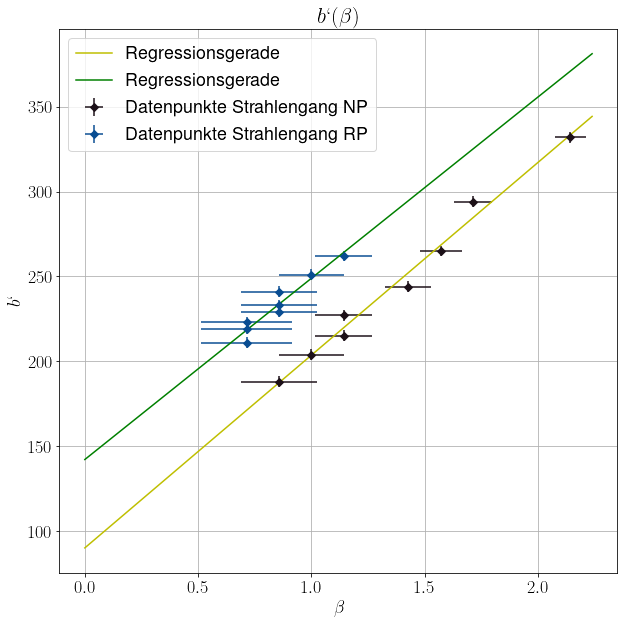

In [43]:
fig, ax = plt.subplots(figsize=(10,10))

x = np.arange(0, 2.25, 0.01)

m1, c1 = np.polyfit(beta1, b_strich_1, 1)
ax.plot(x,x*m1+c1,color='y',label="Regressionsgerade")
m2, c2 = np.polyfit(beta2, b_strich_2, 1)
ax.plot(x,x*m2+c2,color='g',label="Regressionsgerade")

#ax.plot(x, y, color='b', label='label')
#ax.scatter(beta1, b_strich_1, color='r', label='label')
ax.errorbar(beta1, b_strich_1, xerr=beta_std_1, yerr=b_strich_std, fmt='D', color='#1C1018', label='Datenpunkte Strahlengang NP')

#ax.scatter(beta2, b_strich_2, color='b', label='label')
ax.errorbar(beta2, b_strich_2, xerr=beta_std_2, yerr=b_strich_std, fmt='D', color='#094D92', label='Datenpunkte Strahlengang RP')
#ax.errorbar(am_x, am_y, xerr=std_x, yerr=std_y, fmt='D', color='#d0740b', label='label')

ax.set(xlabel=r'$\beta$',ylabel=r'$b`$', title=r'$b`(\beta)$')
ax.legend()
ax.grid()
ax.tick_params(axis='both', which='major', labelsize=18)
ax.tick_params(axis='both', which='minor', labelsize=16)

fig.savefig("f.png")

print(1/m1)
print(1/m2)

print()

print((140*m1)**(-1)+c1)
print((90*m2)**(-1)+c2)